In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---



---



---



---
**Ridge regularisation**

-- When using ridge regression, it becomes important to make sure that your data is normalized: in other words, the values in each column should have mean zero, and variance 1.

-- L2(Ridge) regularisation is makes sure that graph does not go polynomial in other word, it adds penalty in higher value of theta's coefficient.

---
**Lasso regularisation**

-- Lasso regression (L1 regularization) is a form of regularization for linear regression models.

-- Regularization is a statistical method to reduce errors caused by overfitting on training data.

---
**difference**

-- Ridge regression retains all features in the model, reducing the impact of less important features by shrinking their coefficients.

-- Lasso regression can set some coefficients to zero, effectively selecting the most relevant features and improving model interpretability.

-- added in cost function:

LASSO : lambda * |slope|

Ridge : lambda * (slope)^2



---



---



---



### Linear Regression with L2 (Ridge) Regularisation


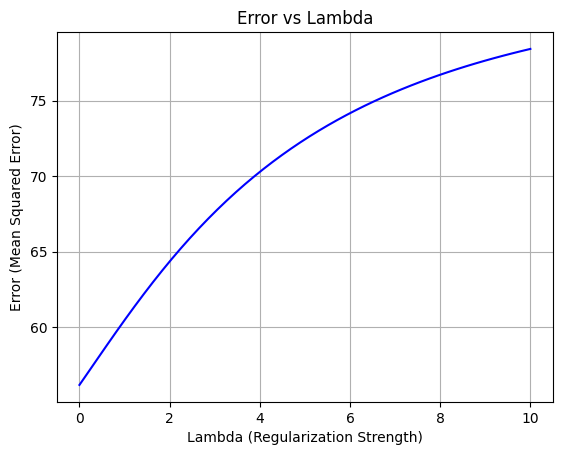

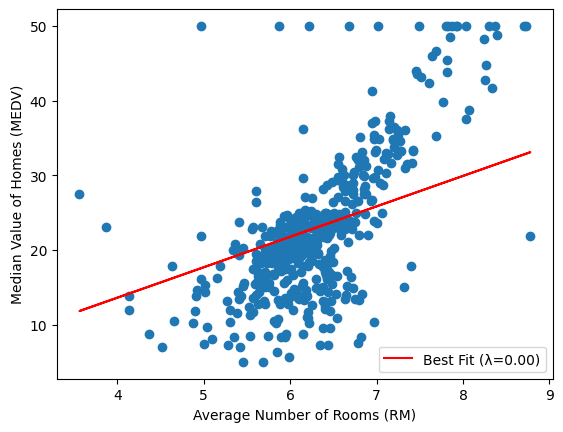

Best Lambda: 0.0
w: 4.076476926443063
b: -2.7019822030254863


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = pd.read_csv('/content/drive/MyDrive/ML/0dataset/Boston.csv')

# Define features and target
X = df['rm'].values
Y = df['medv'].values

iterations = 1000
alpha = 0.01
lambdas = np.linspace(0, 10, 50)  # Lambda values from 0 to 10
errors = []  # To store error values for different lambdas

# Iterate over different lambda values
for lamda in lambdas:
    # Initialize weights and bias
    w = 1
    b = 1

    m = len(Y)  # number of samples

    # Gradient descent
    for i in range(iterations):
        y_cap = w * X + b
        error = y_cap - Y

        # Compute gradients (L2 regularization)
        gradient_w = (1/m) * np.sum(error * X) + lamda * w  # L2 regularization term (lamda * w)
        gradient_b = (1/m) * np.sum(error)

        # Update weights
        w = w - alpha * gradient_w
        b = b - alpha * gradient_b

    # Calculate the final error (mean squared error) for the current lambda
    y_cap_final = w * X + b
    final_error = (1/m) * np.sum((y_cap_final - Y)**2)
    errors.append(final_error)

# Plotting the error vs lambda graph
plt.plot(lambdas, errors, color='blue')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Error (Mean Squared Error)')
plt.title('Error vs Lambda')
plt.grid(True)
plt.show()


########################### re-applying L2 for minimum error lamda ###############################

w = 1  # reinitialize
b = 1

best_lambda = lambdas[np.argmin(errors)]  # Choose lambda with minimum error

for i in range(iterations):
    y_cap = w * X + b
    error = y_cap - Y

    gradient_w = (1/m) * np.sum(error * X) + best_lambda * w  # L2 regularization term (lamda * w)
    gradient_b = (1/m) * np.sum(error)

    w = w - alpha * gradient_w
    b = b - alpha * gradient_b

# Final prediction
f = w * X + b

# Plot the data and the fit
plt.scatter(X, Y, linewidth=1)
plt.plot(X, f, color='red', label=f'Best Fit (λ={best_lambda:.2f})')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.legend()
plt.show()

print("Best Lambda:", best_lambda)
print("w:", w)
print("b:", b)


### Multiple Regression with L2 (Ridge) Regularisation


#### **Fixed Lamda**

total iterations:  2000
weight 1  : 2.3314525244079984
weight 2  : -2.287635705339311
weight 3  : 5.077776140094022
weight 4  : -1.651803252990752
weight 5  : 4.304206159561996
weight 6  : -0.7191397617296009
weight 7  : 17.329619906683533
weight 8  : 3.0399227734157335
weight 9  : 3.2280633425535137
weight 10  : -2.111063889934885
weight 11  : -3.6614138405757046
weight 12  : -2.181135362928013
weight 13  : -9.165250661502768
bias:  15.919724831811152


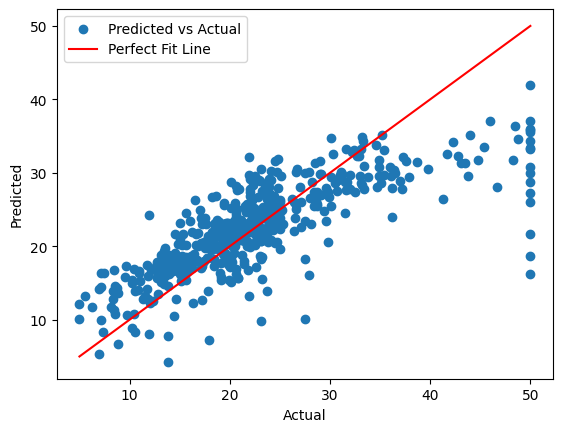

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/ML/#dataset/Boston.csv')
# print(df)

bias = 0
rows = df.shape[0]  # number of rows
cols = df.shape[1]  # number of columns
target = df.iloc[:, -1].values
alpha = 0.01
iterations = 2000
lamda = 1
w = np.ones(cols - 1)

x = df.iloc[:, :-1].values  # Features

#min-max normalization
min = np.min(x, axis=0)
max = np.max(x, axis=0)
x = (x-min)/(max-min)

# #z-normalization #it says how std away is X from mean
# mean = np.mean(x, axis=0)
# std = np.std(x, axis=0)
# x = (x-mean)/std

m = rows

for _ in range(iterations):
    #y_cap
    y_cap = np.dot(x, w) + bias

    # y_cap - y
    y_cap_minus_y = y_cap - target

    #weights and bias
    for i in range(13):
        w[i] = w[i] - alpha * (1 / m) * (np.sum((y_cap_minus_y) * x[: , i]) + lamda * (np.sum(w)))
    bias = bias - alpha * (1 / m) * np.sum(y_cap_minus_y)

print("total iterations: ", iterations)
for i in range(13):
    print("weight" , i+1 , " :", w[i])
print("bias: " , bias)

# Plotting the actual vs predicted values
plt.scatter(target, y_cap, linewidth=1, label='Predicted vs Actual')
plt.plot([np.min(target), np.max(target)], [np.min(target), np.max(target)], color='red', label='Perfect Fit Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


#### **Multiple Lamda for finding best lamda**

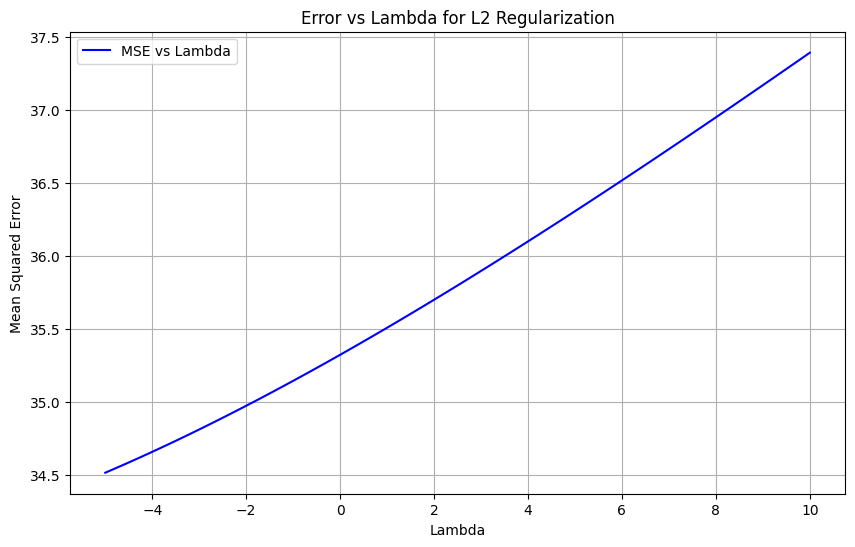

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML/#dataset/Boston.csv')

# Initialize parameters
bias = 0
rows = df.shape[0]  # number of rows
cols = df.shape[1]  # number of columns
target = df.iloc[:, -1].values
alpha = 0.01
iterations = 2000
lambda_values = np.linspace(-5, 10, 100)  # Different lambda values to test
mse_values = []  # To store MSE for each lambda

x = df.iloc[:, :-1].values  # Features

# Min-max normalization
min_val = np.min(x, axis=0)
max_val = np.max(x, axis=0)
x = (x - min_val) / (max_val - min_val)

for lamda in lambda_values:
    w = np.ones(cols - 1)  # Reset weights for each lambda
    bias = 0  # Reset bias for each lambda

    for _ in range(iterations):
        # Predicted values
        y_cap = np.dot(x, w) + bias

        # Calculate error
        y_cap_minus_y = y_cap - target

        # Update weights and bias
        for i in range(cols - 1):
            w[i] = w[i] - alpha * (1 / rows) * (np.sum(y_cap_minus_y * x[:, i]) + lamda * w[i])  # L2 regularization
        bias = bias - alpha * (1 / rows) * np.sum(y_cap_minus_y)

    # Calculate Mean Squared Error
    mse = np.mean((y_cap - target) ** 2)
    mse_values.append(mse)  # Append MSE for the current lambda

# Plotting the MSE vs lambda graph
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, mse_values, label='MSE vs Lambda', color='blue')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Error vs Lambda for L2 Regularization')
plt.legend()
plt.grid(True)
plt.show()


### Multiple Regression with L1 (LASSO) Regularisation

#### **Fixed lamda**

<ipython-input-20-311f5484a903>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[i] = w[i] - [alpha * (1 / m) * (np.sum((y_cap_minus_y) * x[:, i]) + lamda)]


Total iterations: 2000
Weight 1 : 2.3286673470971553
Weight 2 : -1.6067067213551656
Weight 3 : 5.58427574818672
Weight 4 : -1.4019137094807073
Weight 5 : 4.702271981354763
Weight 6 : -0.41957539887257506
Weight 7 : 17.68558698441255
Weight 8 : 3.0766041212780535
Weight 9 : 3.8212283604183996
Weight 10 : -2.132823260224492
Weight 11 : -3.653326510519498
Weight 12 : -2.0074129829581246
Weight 13 : -8.781122446266915
Bias: 15.055214256328334


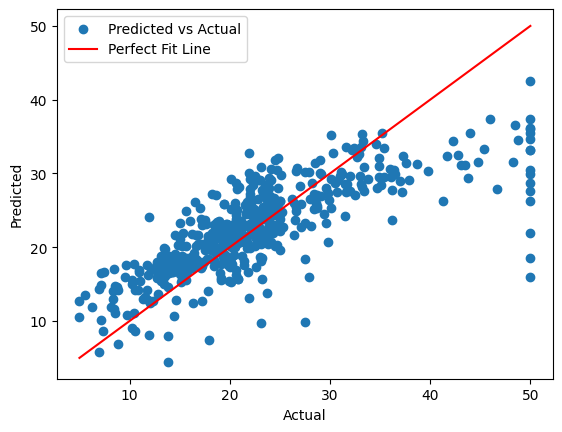

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/ML/0dataset/Boston.csv')

bias = 0
rows = df.shape[0]
cols = df.shape[1]
target = df.iloc[:, -1].values
alpha = 0.01
iterations = 2000
lamda = 1
w = np.ones(cols - 1)

x = df.iloc[:, :-1].values

# min-max normalization
min = np.min(x, axis=0)
max = np.max(x, axis=0)
x = (x - min) / (max - min)

m = rows

for _ in range(iterations):

    y_cap = np.dot(x, w) + bias

    y_cap_minus_y = y_cap - target

    for i in range(13):
        # Lasso regularization update
        if w[i] > 0:
            w[i] = w[i] - [alpha * (1 / m) * (np.sum((y_cap_minus_y) * x[:, i]) + lamda)]
        elif w[i] < 0:
            w[i] = w[i] - alpha * (1 / m) * (np.sum((y_cap_minus_y) * x[:, i]) - lamda)
        else:
            w[i] = w[i] - alpha * (1 / m) * np.sum((y_cap_minus_y) * x[:, i])

    bias = bias - alpha * (1 / m) * np.sum(y_cap_minus_y)

print("Total iterations:", iterations)
for i in range(13):
    print("Weight", i + 1, ":", w[i])
print("Bias:", bias)

# Plotting the actual vs predicted values
plt.scatter(target, y_cap, linewidth=1, label='Predicted vs Actual')
plt.plot([np.min(target), np.max(target)], [np.min(target), np.max(target)], color='red', label='Perfect Fit Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


#### **Multiple lamda for finding best lamda**

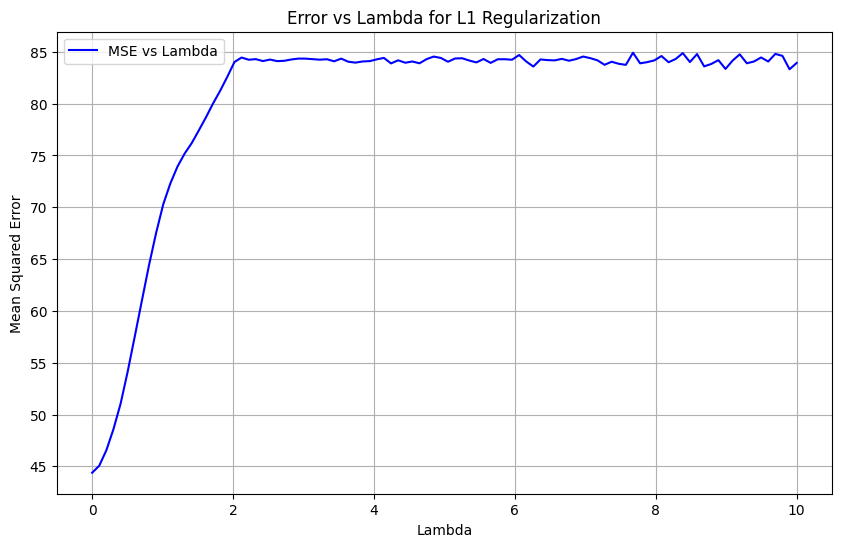

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML/0dataset/Boston.csv')

# Initialize parameters
bias = 0
rows = df.shape[0]  # number of rows
cols = df.shape[1]  # number of columns
target = df.iloc[:, -1].values
alpha = 0.01
iterations = 1000
lambda_values = np.linspace(0, 10, 100)  # Different lambda values to test
mse_values = []  # To store MSE for each lambda

x = df.iloc[:, :-1].values  # Features

# Min-max normalization
min_val = np.min(x, axis=0)
max_val = np.max(x, axis=0)
x = (x - min_val) / (max_val - min_val)

for lamda in lambda_values:
    w = np.ones(cols - 1)  # Reset weights for each lambda
    bias = 0  # Reset bias for each lambda

    for _ in range(iterations):
        # Predicted values
        y_cap = np.dot(x, w) + bias

        # Calculate error
        y_cap_minus_y = y_cap - target

        # Update weights and bias
        for i in range(cols - 1):
          # Calculate the gradient of the loss with respect to weight w[i]
          gradient = (1 / rows) * np.sum(y_cap_minus_y * x[:, i])

          # Update weight with L1 penalty
          w[i] -= alpha * (gradient + lamda * np.sign(w[i]))  # L1 penalty integrated  ## Sign (+/-) will be taken of W

        bias = bias - alpha * (1 / rows) * np.sum(y_cap_minus_y)

    # Calculate Mean Squared Error
    mse = np.mean((y_cap - target) ** 2)
    mse_values.append(mse)  # Append MSE for the current lambda

# Plotting the MSE vs lambda graph
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, mse_values, label='MSE vs Lambda', color='blue')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Error vs Lambda for L1 Regularization')
plt.legend()
plt.grid(True)
plt.show()


### Linear Regression with L2 regularisation (SKLearn)

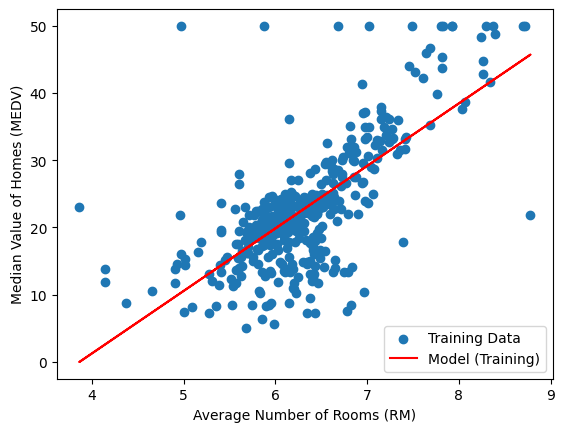

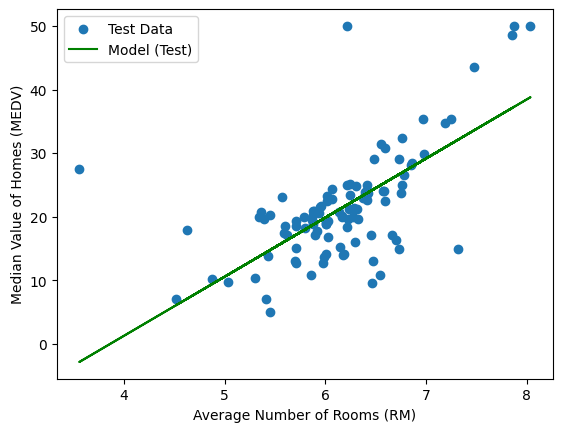

w (coefficient): 9.302440133949363
b (intercept): -35.95666409551454


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

df = pd.read_csv('/content/drive/MyDrive/ML/0dataset/Boston.csv')

X = df[['rm']].values
Y = df['medv'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Ridge(alpha=1.0)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

plt.scatter(X_train, Y_train, linewidth=1, label="Training Data")
plt.plot(X_train, model.predict(X_train), color='red', label="Model (Training)")
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.legend()
plt.show()

plt.scatter(X_test, Y_test, linewidth=1, label="Test Data")
plt.plot(X_test, Y_pred, color='green', label="Model (Test)")
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.legend()
plt.show()

print("w (coefficient):", model.coef_[0])
print("b (intercept):", model.intercept_)


### Multiple regression with L2 Regularization (SKlearn)

w (coefficients): [-3.49117996e-03 -1.23899887e-01  3.52648595e-02 -6.22447182e-03
  2.77471169e+00 -9.94934928e+00  4.31223173e+00 -1.43236024e-02
 -1.38036951e+00  2.55504704e-01 -1.14295136e-02 -7.99623521e-01
 -5.58100699e-01]
b (intercept): 31.94994956336751
R-squared (train): 0.7387137731724034
R-squared (test): 0.6837039261319882


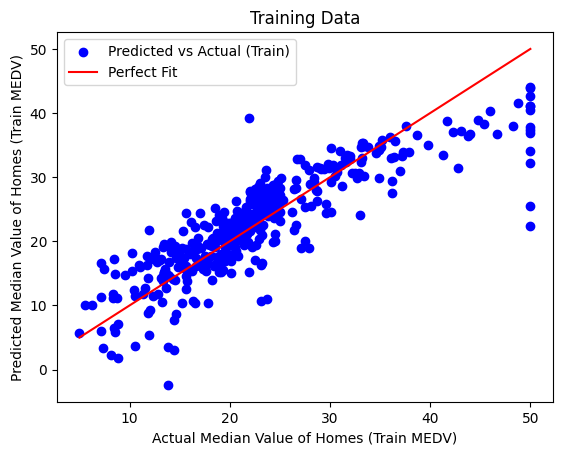

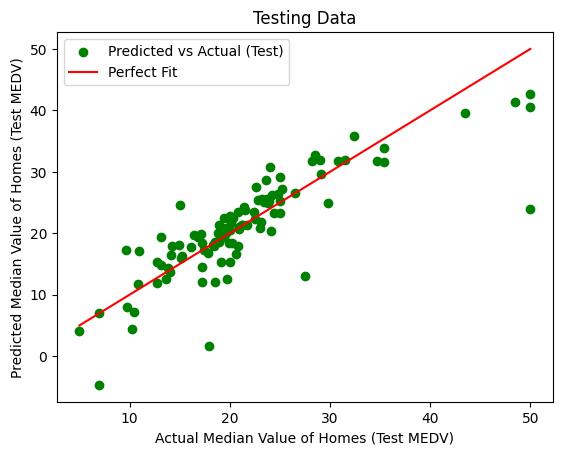

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

df = pd.read_csv('/content/drive/MyDrive/ML/0dataset/Boston.csv')

X = df.drop(columns=['medv']).values
Y = df['medv'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)

# predictions on both the train and test
Y_train_pred = ridge_model.predict(X_train)
Y_test_pred = ridge_model.predict(X_test)

#R-squared score
r_squared_train = r2_score(Y_train, Y_train_pred)
r_squared_test = r2_score(Y_test, Y_test_pred)

print("w (coefficients):", ridge_model.coef_)
print("b (intercept):", ridge_model.intercept_)
print("R-squared (train):", r_squared_train)
print("R-squared (test):", r_squared_test)

#training
plt.scatter(Y_train, Y_train_pred, color='blue', label="Predicted vs Actual (Train)")
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], color='red', label="Perfect Fit")
plt.xlabel('Actual Median Value of Homes (Train MEDV)')
plt.ylabel('Predicted Median Value of Homes (Train MEDV)')
plt.legend()
plt.title('Training Data')
plt.show()

#testing
plt.scatter(Y_test, Y_test_pred, color='green', label="Predicted vs Actual (Test)")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', label="Perfect Fit")
plt.xlabel('Actual Median Value of Homes (Test MEDV)')
plt.ylabel('Predicted Median Value of Homes (Test MEDV)')
plt.legend()
plt.title('Testing Data')
plt.show()